   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        1       3  12669  9656     7561     214              2674        1338
1        2       1   7057  9810     9568    1762              3293        1776
2        1       3   6353  8808     7684    2405              3516        7844
3        2       2  13265  1196     4221    6404               507        1788
4        1       1  22615  5410     7198    3915              1777        5185
(20, 8)


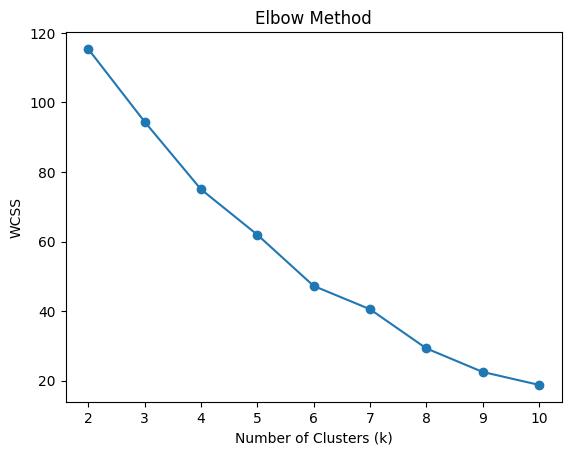

k=2, Silhouette Score=0.483
k=3, Silhouette Score=0.156
k=4, Silhouette Score=0.138
k=5, Silhouette Score=0.157


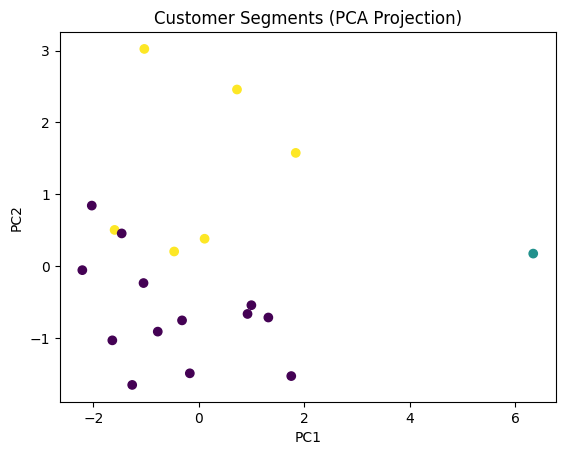

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.307692  2.538462   9774.307692   5756.076923   8788.000000   
1        2.000000  2.000000  31714.000000  12319.000000  27642.000000   
2        1.666667  1.166667  13238.166667   5947.666667   8250.666667   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0         898.307692       2954.307692  1814.461538  
1        2388.000000      11894.000000  9876.000000  
2        2787.500000       2511.666667  2401.833333  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#Data Load
df = pd.read_csv("wholesale_customers_sample.csv")
print(df.head())
print(df.shape)

#Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#Find Optimal Number of Clusters
wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

#Silhouette Score
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")

#K-mean
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

#PCA for Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segments (PCA Projection)")
plt.show()

#Cluster Interpretation
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)